# P5. Analysing data: applying operations and plotting trends
## Practical Notebook 5 (of 6) for *Intro to the NCAS CF Data Tools, cf-python and cf-plot*

**In this section we demonstrate how to do some data analysis including performing arithmetic and statistical calculations on the data, showing how cf-python's CF Conventions metadata awareness means that the metadata is automatically updated to account for the operations that are performed.**

***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> run the cell in this section to do the set up, which is not part of the practical proper.
</div>

## Setting up

**In this short prelude we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries and the data (exactly as per the first Notebook setup but in one cell only for quick execution).**

In [1]:
# Set up for inline plots - only needed inside a Notebook environment - and to ignore some repeating warnings
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Import the two CF Data Tools libraries and inspect the versions
import cfplot as cfp
import cf
print("--- Version report: ---")
print("cf-python version is:", cf.__version__)
print("cf-plot version is:", cfp.__version__)
print("CF Conventions version is:", cf.CF())

# See what datasets we have to explore within the data directory we use throughout this course
print("--- Datasets available from the path '../data': ---")
# Note that in a Jupyter Notebook, '!' precedes a shell command - so this is a command, not Python
!ls ../data

--- Version report: ---
cf-python version is: 3.18.1
cf-plot version is: 3.4.0
CF Conventions version is: 1.12
--- Datasets available from the path '../data': ---
160by320griddata.nc			   precip_2010.nc
aaaaoa.pmh8dec.pp			   precip_DJF_means.nc
alpine_precip_DJF_means.nc		   qbo.nc
data1.nc				   regions.nc
data1-updated.nc			   rgp.nc
data2.nc				   sea_currents_backup.nc
data3.nc				   sea_currents.nc
data5.nc				   ta.nc
ggas2014121200_00-18.nc			   tripolar.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  two_fields.nc
land.nc					   ua.nc
model_precip_DJF_means_low_res.nc	   u_n216.nc
model_precip_DJF_means.nc		   u_n96.nc
n2o_emissions.nc			   vaAMIPlcd_DJF.nc
POLCOMS_WAM_ZUV_01_16012006.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc
precip_1D_yearly.nc


***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> now we can start the practical. We will follow the same sectioning as in the teaching notebook, so please consult the notes there in the matching section for guidance and you can also consult the cf-python and cf-plot documentation linked above.
</div>

## 5. Analysing data: applying mathematical and statistical operations and plotting trends

### a) Applying mathematics e.g. arithmetic and trigonometry on fields

**5.a.1)** Read in the dataset 'ggas2014121200_00-18.nc' from the usual data directory 'data' (note this is the`fieldlist` we explored in section 3, but this time, we'll work with a different field within it). Take the *fourth* field in order and assign it to a variable called `field`. Inspect it with medium detail.

In [2]:
fieldlist = cf.read("../data/ggas2014121200_00-18.nc")
field = fieldlist[3]
print(field)

Field: long_name=Sea surface temperature (ncvar%SSTK)
-----------------------------------------------------
Data            : long_name=Sea surface temperature(time(4), axis=Z(1), latitude(256), longitude(512)) K
Dimension coords: time(4) = [2014-12-12 00:00:00, ..., 2014-12-12 18:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(256) = [89.46282196044922, ..., -89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east


**5.a.2)** Take a subspace of the first time point, assigning it to a new variable called `field_subspace`, and plot it on a contour plot to see what the underlying data is like. Making a plot with cf-plot early on in this way is, for example, a good way to get a quick look at a new dataset to get a feel for the overall scope and patterns.

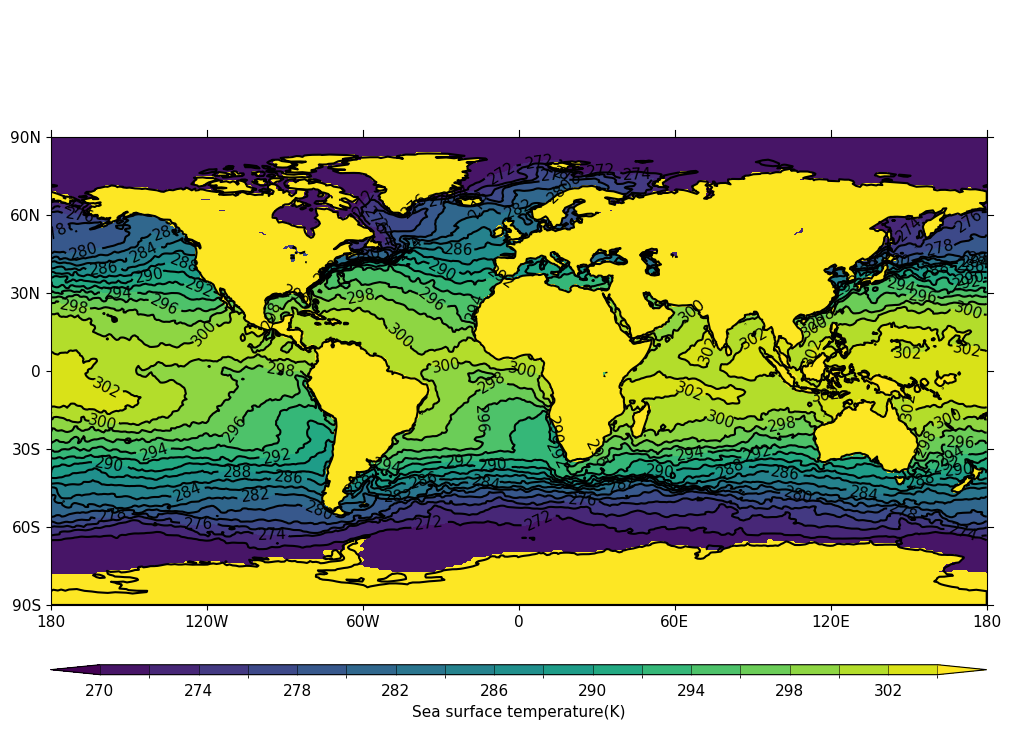

In [3]:
field_subspace = field[0, :, :, :]
cfp.con(field_subspace)

**5.a.3)** To normalise data representing a variable `x`, there is the general formula `normalized_x = (x - minimum_x) / x-range`. Use the cf-python methods available on a field, namely `minimum()` and `range()`, to normalise the data in the subspace of `field` we defined as `field_subspace` from the previous step. Call this result `norm_field` as a new Python variable. Hint: you can apply these methods directly on the field which knows to apply them to its underlying data, and the whole data array will be operated on at once, as with array operations in NumPy and similar Python array libraries.

Finally, re-plot the contour plot at the subspace on the first time point to see that the data has been normalised appropriately: the colour bar range should go from 0 to 1 now but the data plot itself (contour pattern and colours) should not have changed because the normalisation adjusts all values to the 0 to 1 range but preserves the relative magnitudes between them.

Field: ncvar%SSTK (ncvar%SSTK)
------------------------------
Data            : ncvar%SSTK(time(1), axis=Z(1), latitude(256), longitude(512)) 1
Dimension coords: time(1) = [2014-12-12 00:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(256) = [89.46282196044922, ..., -89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east


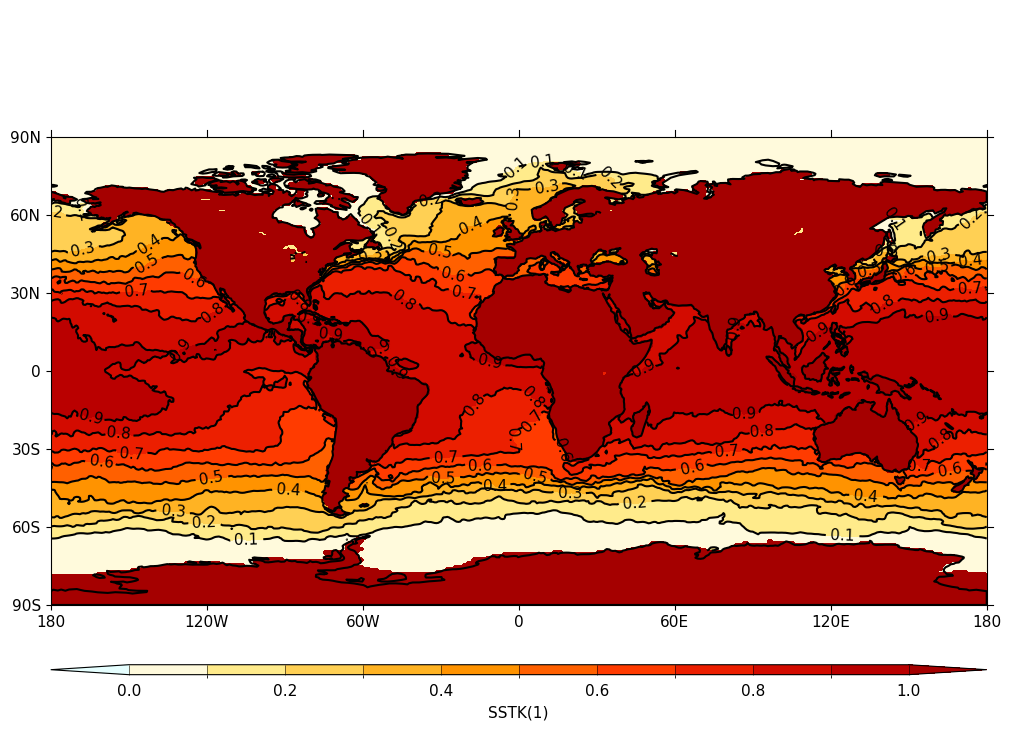

In [4]:
norm_field = (field_subspace - field_subspace.minimum()) / field_subspace.range()
print(norm_field)
cfp.con(norm_field)

**5.a.4)** Finally, to explore basic field arithmetic and see the influence on the data via a plot, multiply `field_subspace` by negative one and plot this result as a contour plot. Describe in a sentence comment the difference in the plot to the original from .

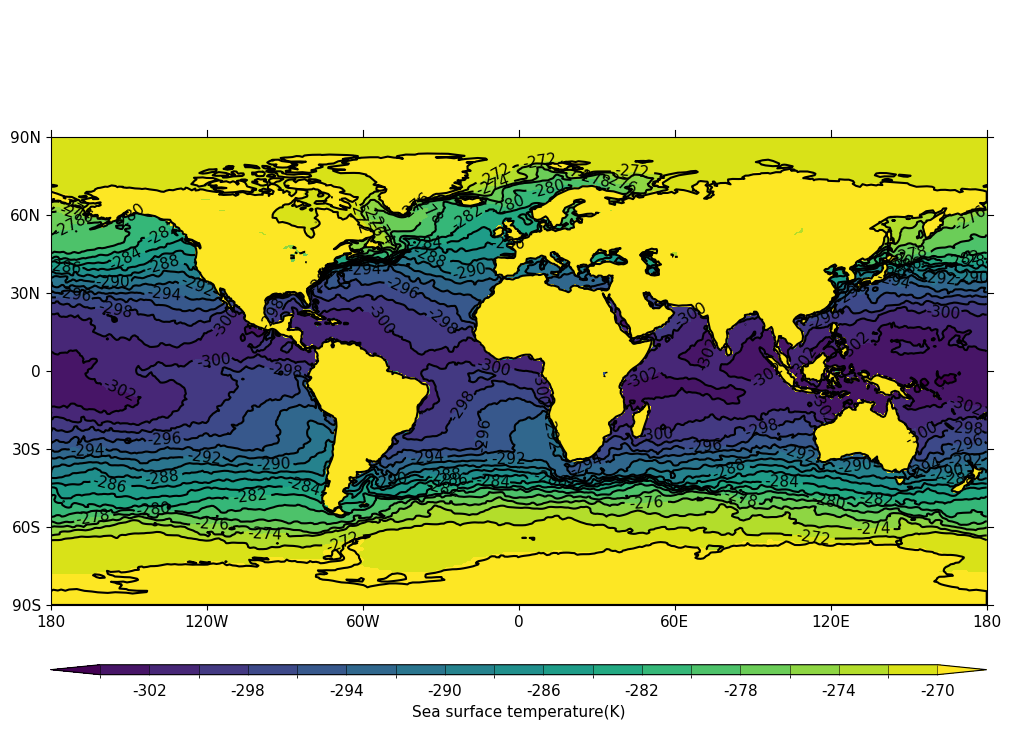

In [5]:
field_reversed = -1 * field_subspace
cfp.con(field_reversed)

### b) Line plotting

**5.b.1)** Let's make some line plots. To set this up, read in the file `IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc` under the usual directory `../data` and assign the *first* field in that FieldList to a variable called `monthly_field`. Inspect it with medium detail.

In [6]:
monthly_field = cf.read("../data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc")[0]
print(monthly_field)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


**5.b.2)** Notice that the `monthly_field` is three-dimensional (3D) with axes sizes all over one for each of the three dimensions. In order to do a lineplot, we need a one-dimensional series, so we need to reduce the field down to size one in two of the dimensions to make a line plot.

Let's do a collapse to reduce the two spatial axes, latitude and longitude, at once. Do a collapse to the maximum over those two axes, assigning it to a variable we'll call `spatial_max_monthly_field`. You can specify both of those axes by name, or you can use `"area"` as a shorthand string which means both latitude and longitude at once.

In [7]:
spatial_max_monthly_field = monthly_field.collapse("area: maximum")

**5.b.3)** Use cf-plot to make a line plot of the collapsed field `spatial_max_monthly_field` from the cell above.

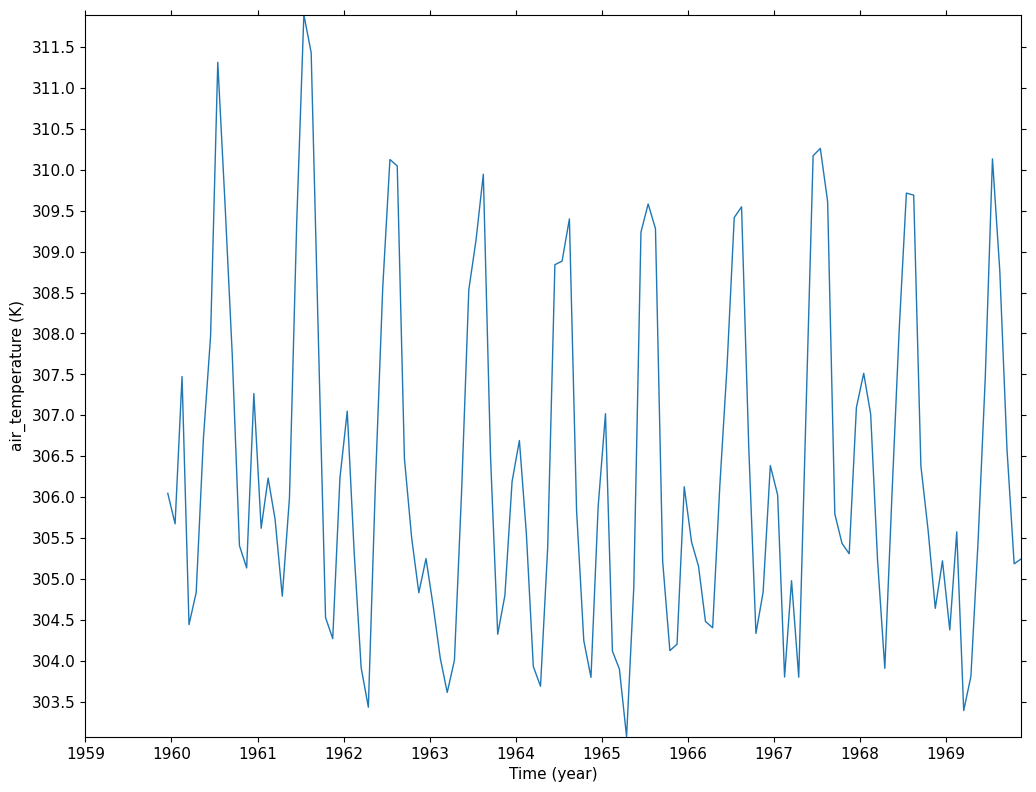

In [8]:
cfp.lineplot(spatial_max_monthly_field)

### c) Calculating seasonal trends

**5.c.1)** Define a new variable `get_mam_season` and set it to the cf-python function `mam()` which represents a specific collapse over the months of March, April and May, just like `cf.djf()` represents a collapse over December, January and February etc. - there are four such methods to cover each trio of months closely aligned with the seasons, two of which were demonstrated in the teaching Notebook.

In [9]:
get_mam_season = cf.mam()

**5.c.2)** Do a grouped collapse over the months of March, April and May only using the `group` argument set to `get_mam_season`, for a *maximum* collapse over the *time* axis on the `spatial_max_monthly_field`. Make a line plot of this collapsed field.

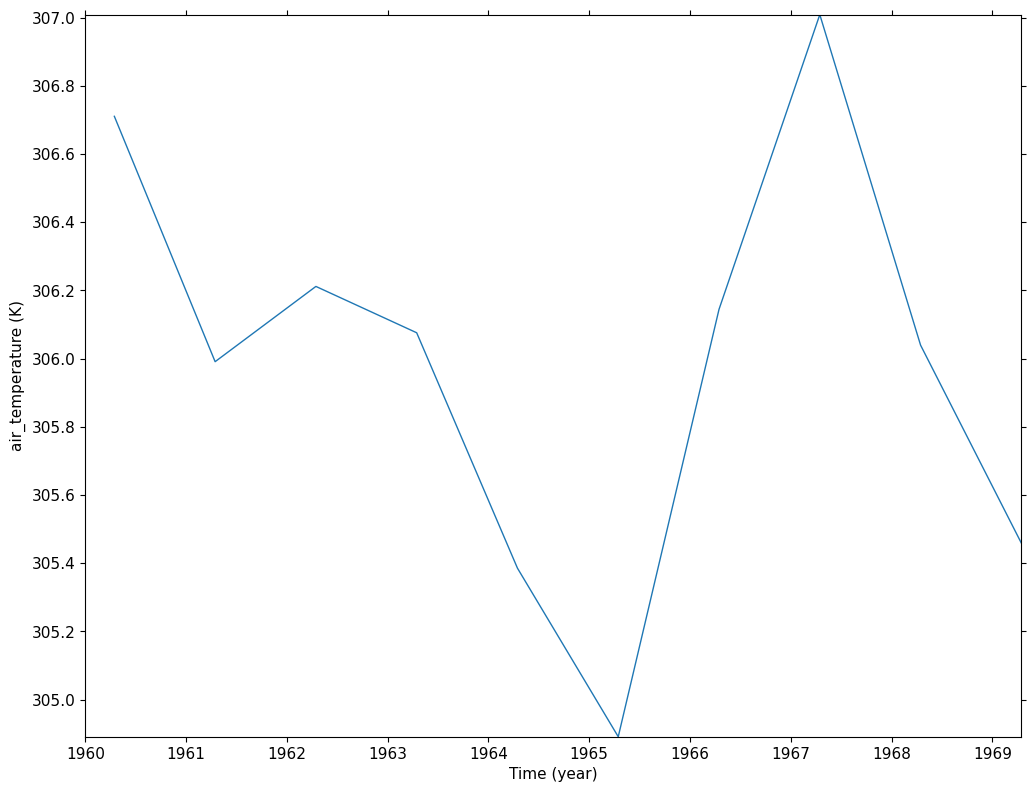

In [10]:
mam_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_mam_season)
cfp.lineplot(mam_season_max)

**5.c.3)** Define three more variables representing specific collapse over the DJF, JJA and SON trio of months using the appropriate cf-python methods to complete the set across the calendar year (`cf.son()` is for the SON months and use the teaching Notebook for guidance on the other two methods if required but their names follow the same pattern so you can possibly guess them), assigning them to variables `get_djf_season`, `get_jja_season` and `get_son_season` respectively.

Then, using those three variables one-by-one, define three grouped collapses, also for a *maximum* collapse over the *time* axis as above, on the `spatial_max_monthly_field` field using these as the `group`, calling them `djf_season_max`, `jja_season_max` and `son_season_max` corresponding to the collapses in order above.

In [11]:
get_djf_season = cf.djf()
get_jja_season = cf.jja()
get_son_season = cf.son()
djf_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_djf_season)
jja_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_jja_season)
son_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_son_season)

### d) Plotting the seasonal trends on one (line)plot

**5.d.1)** Let's make a line plot which shows all of the fields above: the four season maximum trends `djf_season_max`, `mam_season_max`, `jja_season_max` and `son_season_max`, along with the `spatial_max_monthly_field`. Use the code block from the teaching Notebook as a guide, or otherwise: you will need to wrap all of the calls to `lineplot` within `cfp.gopen()` and `cfp.gclose()` so they are plotted on the same canvas. You do not need to set positions.

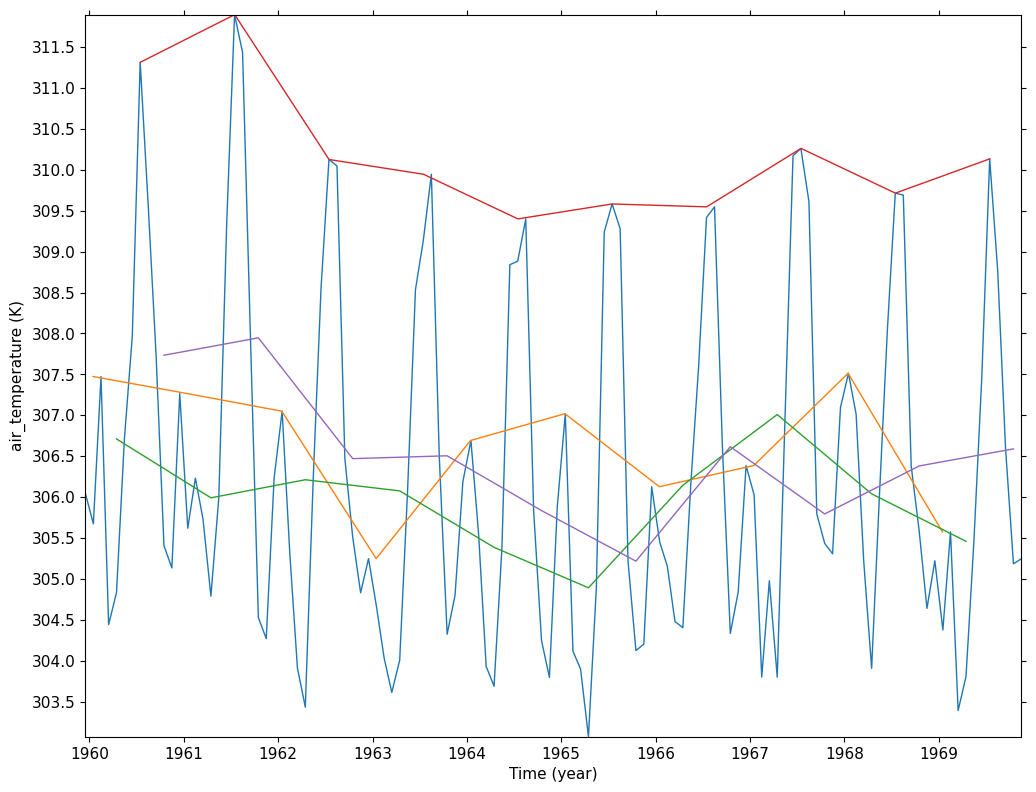

In [12]:
cfp.gopen()
cfp.lineplot(spatial_max_monthly_field)
cfp.lineplot(djf_season_max)
cfp.lineplot(mam_season_max)
cfp.lineplot(jja_season_max)
cfp.lineplot(son_season_max)
cfp.gclose()

**5.d.2)** Finally, copy your code from the previous cell and use the `label` argument to `lineplot` to assign labels to your individual line plot calls, which will result in a legend emerging on the final plot with the labels to identify each line.

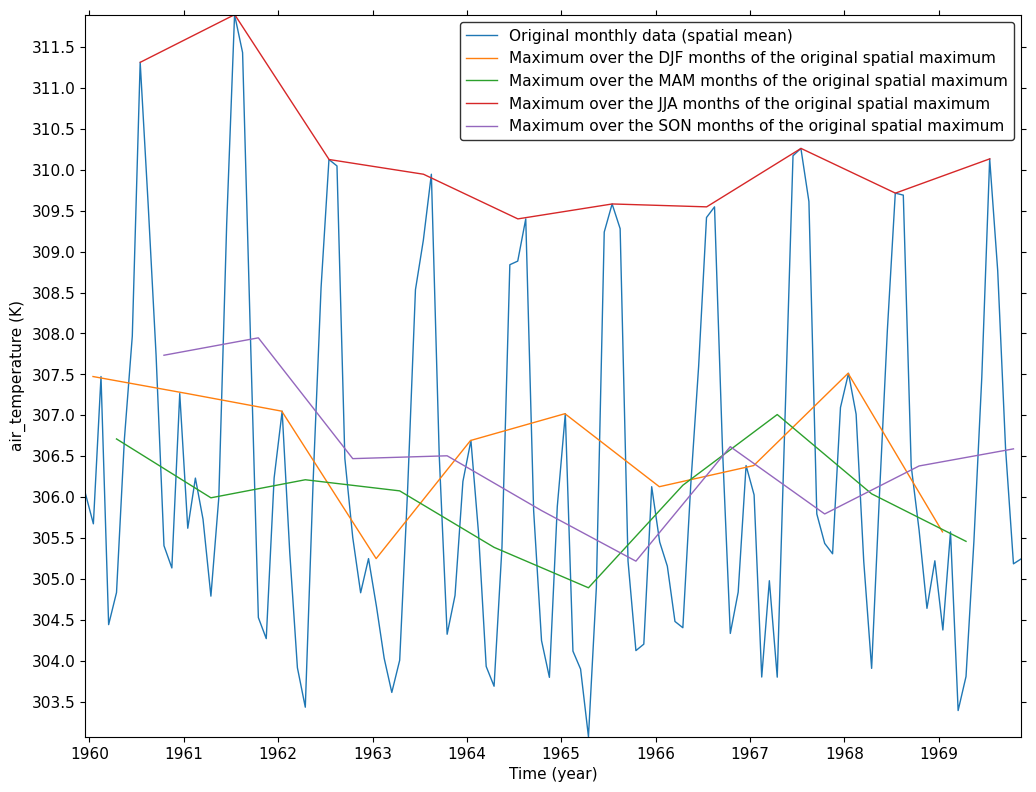

In [13]:
cfp.gopen()
cfp.lineplot(spatial_max_monthly_field, label="Original monthly data (spatial mean)")
cfp.lineplot(djf_season_max, label="Maximum over the DJF months of the original spatial maximum")
cfp.lineplot(mam_season_max, label="Maximum over the MAM months of the original spatial maximum")
cfp.lineplot(jja_season_max, label="Maximum over the JJA months of the original spatial maximum")
cfp.lineplot(son_season_max, label="Maximum over the SON months of the original spatial maximum")
cfp.gclose()

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> this is the end of the section. Please check your work, review the material and then move on to Practical 6 (see the Notebook 'cf_data_tools_practical_06.ipynb').
</div>

***